--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-nu

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_12696\229025614.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, order=class_counts.index, palette='viridis')
C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_12696\229025614.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set2')
C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_12696\229025614.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set2')
C:\Users\Nidish 

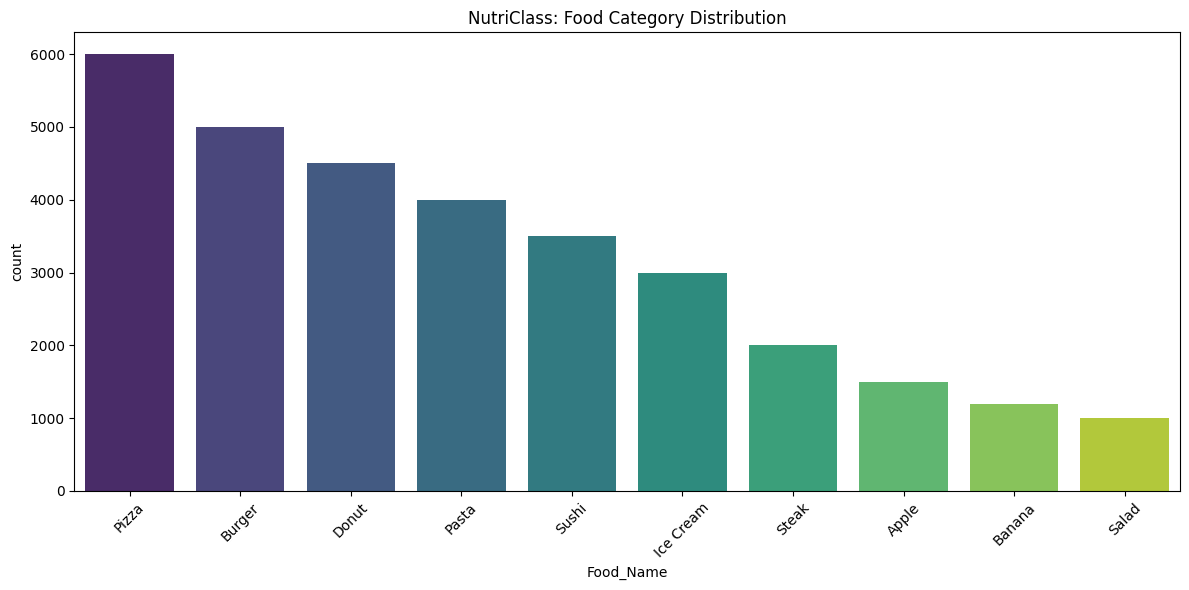

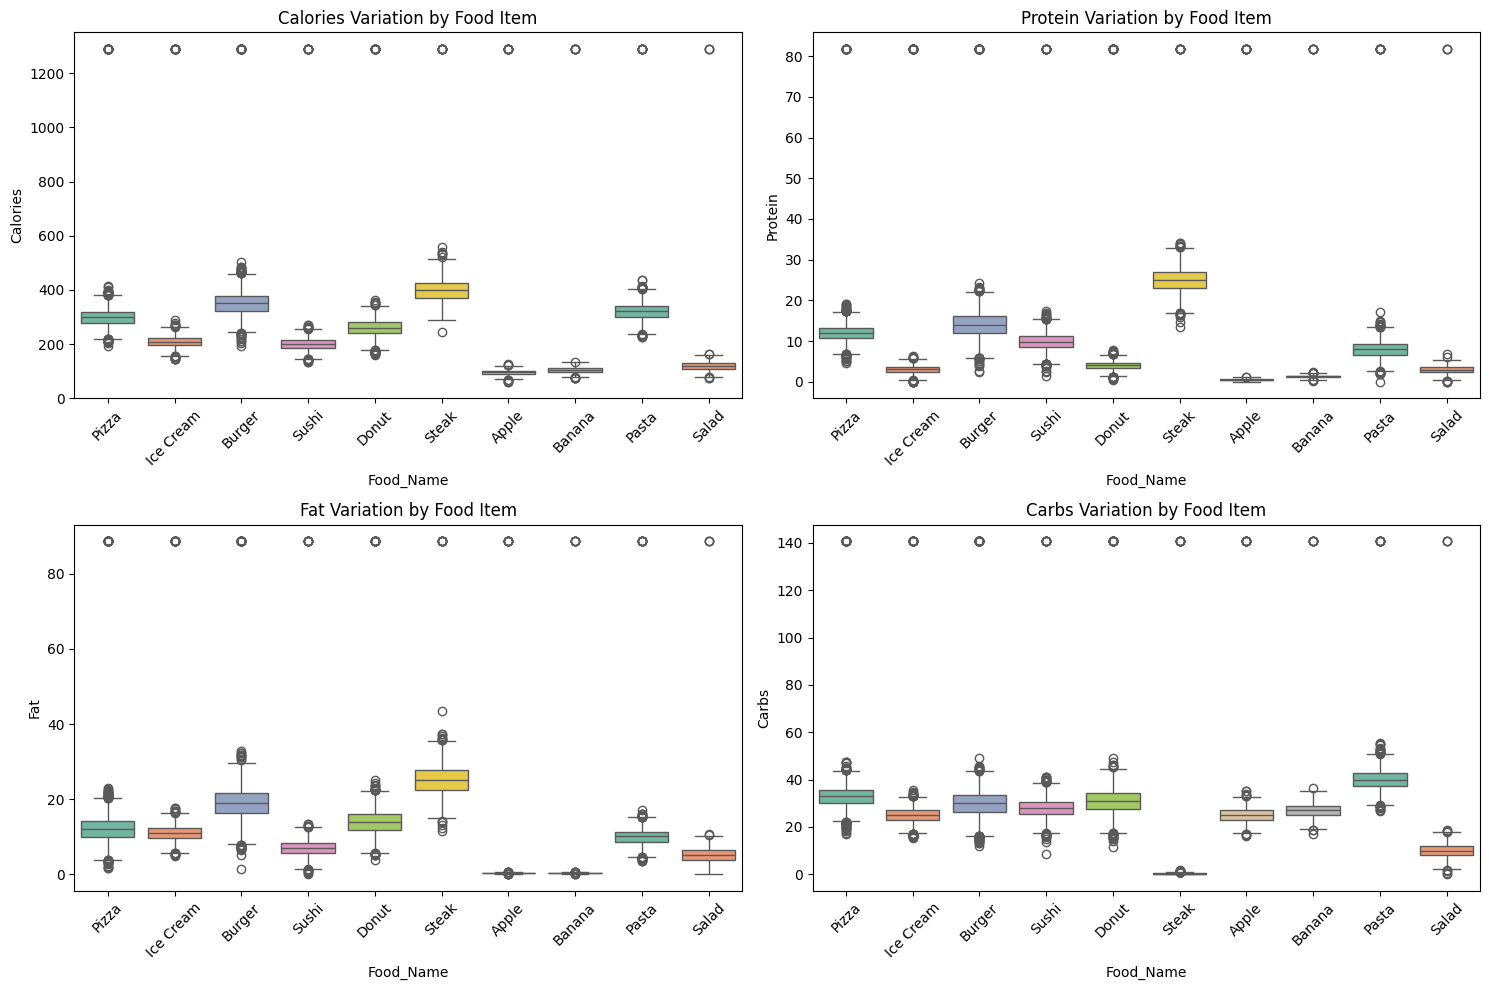

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\synthetic_food_dataset_imbalanced.csv")

# 1. Basic Information
print("--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

# 2. Dataset Size
print(f"\nDataset Shape: {df.shape}")

# 3. Class Distribution
# Assuming 'Food_Name' is the target class
target_col = 'Food_Name'
class_counts = df[target_col].value_counts()
print("\n--- Class Distribution ---")
print(class_counts)

# 4. Check for Noise/Missing Values/Duplicates
print("\n--- Missing Values ---")
print(df.isnull().sum())
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# 5. Visualization - Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=target_col, order=class_counts.index, palette='viridis')
plt.title('NutriClass: Food Category Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_distribution.png')

# 6. Visualization - Inter-class Variation (Boxplot for Calories and Protein)
features_to_plot = ['Calories', 'Protein', 'Fat', 'Carbs']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=target_col, y=col, palette='Set2')
    plt.title(f'{col} Variation by Food Item')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('interclass_variation.png')

In [1]:
import pandas as pd

# Load the original dataset to check the raw relationship
df_raw = pd.read_csv('synthetic_food_dataset_imbalanced.csv')

# 1. Check for rows where Glycemic_Index is present but Carbs is NaN
gi_not_null = df_raw[df_raw['Glycemic_Index'].notnull()]
missing_carbs_with_gi = gi_not_null[gi_not_null['Carbs'].isnull()]

# 2. Check for rows where Carbs is 0 but Glycemic_Index is > 0
# (After imputation or in raw data)
zero_carbs_positive_gi = df_raw[(df_raw['Carbs'] == 0) & (df_raw['Glycemic_Index'] > 0)]

print(f"Total rows with GI values: {len(gi_not_null)}")
print(f"Rows with GI but MISSING Carbs: {len(missing_carbs_with_gi)}")
print(f"Rows with 0 Carbs but Positive GI: {len(zero_carbs_positive_gi)}")

# Display a sample of rows where both exist to show the relationship
print("\n--- Sample of Carbs vs Glycemic_Index ---")
print(df_raw[['Food_Name', 'Carbs', 'Glycemic_Index']].dropna().head(10))

Total rows with GI values: 31325
Rows with GI but MISSING Carbs: 0
Rows with 0 Carbs but Positive GI: 522

--- Sample of Carbs vs Glycemic_Index ---
   Food_Name      Carbs  Glycemic_Index
0      Pizza  35.266644       81.575896
1  Ice Cream  23.218957       69.522492
2     Burger  29.479164       62.552384
3      Sushi  32.097878       68.688853
4      Donut  29.756638       70.385059
5     Burger  35.048055       64.200334
6  Ice Cream  26.820159       66.916522
7  Ice Cream  21.365235       59.062833
8      Steak   0.000000        0.957229
9     Burger  33.325020       75.015328


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\synthetic_food_dataset_imbalanced.csv")

# Assuming 'df' is your DataFrame
# Fix logical inconsistency: If Carbs are 0, Glycemic Index must be 0
df.loc[df['Carbs'] == 0, 'Glycemic_Index'] = 0

# Verification: Count how many rows still have 0 Carbs but GI > 0
inconsistent_count = df[(df['Carbs'] == 0) & (df['Glycemic_Index'] > 0)].shape[0]
print(f"Number of inconsistent rows remaining: {inconsistent_count}")

# Check the results for Steak (which often has 0 carbs)
print(df[df['Food_Name'] == 'Steak'][['Food_Name', 'Carbs', 'Glycemic_Index']].head())

Number of inconsistent rows remaining: 0
   Food_Name     Carbs  Glycemic_Index
8      Steak  0.000000        0.000000
14     Steak  0.316837        0.000000
46     Steak  0.534886        0.311984
49     Steak  0.000000        0.000000
60     Steak  0.000000        0.000000


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\synthetic_food_dataset_imbalanced.csv")

# 1. Check for rows where GI is 0 but Carbs > 0
gi_zero_carbs_positive = df[(df['Glycemic_Index'] == 0) & (df['Carbs'] > 0)]
count_inconsistent = len(gi_zero_carbs_positive)

print(f"Number of rows with GI = 0 and Carbs > 0: {count_inconsistent}")

if count_inconsistent > 0:
    print("\nSample of inconsistent rows (before fix):")
    print(gi_zero_carbs_positive[['Food_Name', 'Carbs', 'Glycemic_Index']].head())

# 2. Apply the fix: if GI is 0, make Carbs as 0
df.loc[df['Glycemic_Index'] == 0, 'Carbs'] = 0

# 3. Verification
after_fix_check = df[(df['Glycemic_Index'] == 0) & (df['Carbs'] > 0)].shape[0]
print(f"\nNumber of inconsistent rows after fix: {after_fix_check}")

# Save the updated dataset
df.to_csv('synthetic_food_dataset_v3.csv', index=False)

Number of rows with GI = 0 and Carbs > 0: 485

Sample of inconsistent rows (before fix):
    Food_Name     Carbs  Glycemic_Index
14      Steak  0.316837             0.0
63      Steak  0.307295             0.0
154     Steak  0.067366             0.0
247     Steak  0.187635             0.0
284     Steak  0.182351             0.0

Number of inconsistent rows after fix: 0


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\synthetic_food_dataset_imbalanced.csv")

# Use a small epsilon for floating point numbers
epsilon = 1e-5

# If Carbs is near 0, set both to 0
df.loc[df['Carbs'] < epsilon, ['Carbs', 'Glycemic_Index']] = 0

# If GI is near 0, set both to 0
df.loc[df['Glycemic_Index'] < epsilon, ['Carbs', 'Glycemic_Index']] = 0

# Verification
check = df[(df['Carbs'] == 0) & (df['Glycemic_Index'] > 0)].shape[0]
print(f"Remaining inconsistent rows: {check}")

# Save this version - It is now perfectly synced in original units
df.to_csv('NutriClass_Final_Cleaned.csv', index=False)

Remaining inconsistent rows: 0


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Final_Cleaned.csv")

# 1. Check for rows where Carbs is 0 but Sugar is positive
inconsistent_sugar = df[(df['Carbs'] == 0) & (df['Sugar'] > 0)]
print(f"Number of rows with Carbs = 0 and Sugar > 0: {len(inconsistent_sugar)}")

# 2. Fix Step A: If Carbs is 0, Sugar must be 0
df.loc[df['Carbs'] == 0, 'Sugar'] = 0

# 3. Fix Step B: If Sugar > Carbs (even if Carbs > 0), cap Sugar to the Carbs value
# Because total carbs must be greater than or equal to sugar
df.loc[df['Sugar'] > df['Carbs'], 'Sugar'] = df['Carbs']

# Verification
remaining_errors = df[df['Sugar'] > df['Carbs']].shape[0]
print(f"Remaining logical errors: {remaining_errors}")

# Save the corrected dataset
df.to_csv('NutriClass_Logic_Fixed.csv', index=False)

Number of rows with Carbs = 0 and Sugar > 0: 737
Remaining logical errors: 0
